In [1]:
import os
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
from tqdm import tqdm_notebook

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import seaborn as sns ;
# sns.set_style(style="fivethirtyeight")
sns.set_style("white")

from sklearn.metrics import r2_score, mean_absolute_error


%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

os.environ['PYTHONHASHSEED'] = str(2)
np.random.seed(2)

In [2]:
plt.rc('font', family='Times New Roman')
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [3]:
#read data from the csv file
df = pd.read_csv("occupancy.csv", index_col="Index")

In [4]:
df

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Index,,,,,,,
1,2/4/2015 17:51,23.18,27.2720,426.0,721.250000,0.004793,1
2,2/4/2015 17:51,23.15,27.2675,429.5,714.000000,0.004783,1
3,2/4/2015 17:53,23.15,27.2450,426.0,713.500000,0.004779,1
4,2/4/2015 17:54,23.15,27.2000,426.0,708.250000,0.004772,1
5,2/4/2015 17:55,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2/10/2015 9:29,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2/10/2015 9:29,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2/10/2015 9:30,21.10,36.0950,433.0,798.500000,0.005596,1


In [5]:
#Drop the date column
df.drop(["Date"], inplace=True, axis =1)

In [6]:
#seperate features and target
target = "Occupancy"
X = df.drop(target, axis =1)
Y = df.loc[:,target]

In [7]:
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
Index,,,,,
1,23.18,27.2720,426.0,721.25,0.004793
2,23.15,27.2675,429.5,714.00,0.004783
3,23.15,27.2450,426.0,713.50,0.004779
4,23.15,27.2000,426.0,708.25,0.004772
5,23.10,27.2000,426.0,704.50,0.004757


In [8]:
Y.head()

Index
1    1
2    1
3    1
4    1
5    1
Name: Occupancy, dtype: int64

<AxesSubplot:>

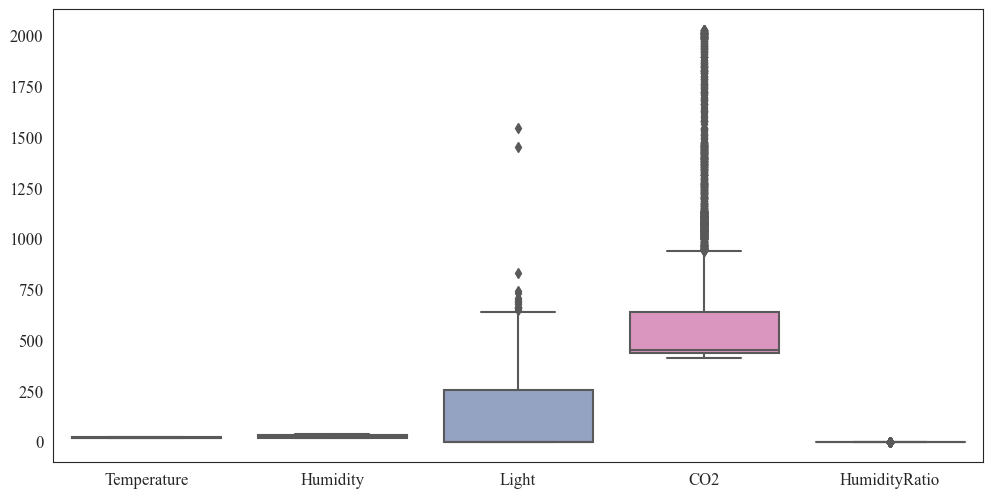

In [9]:
#visualisation of the data using a box plot before normalization
sns.boxplot(data=X, orient="v", palette="Set2")

In [10]:
#normalize data
X = (X - X.mean())/X.std()
# Describe each column in the DataFrame 
X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,8.143000e+03,8.143000e+03,8.143000e+03,8.143000e+03,8.143000e+03
mean,-7.312927e-13,-1.064968e-13,1.396130e-16,-2.024388e-15,5.584519e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.592150e+00,-1.624691e+00,-6.136884e-01,-6.165554e-01,-1.394270e+00
25%,-9.037947e-01,-1.000054e+00,-6.136884e-01,-5.330420e-01,-9.200908e-01
50%,-2.252728e-01,8.876767e-02,-6.136884e-01,-4.869108e-01,-7.243274e-02
75%,7.580921e-01,8.681329e-01,7.027037e-01,1.027202e-01,5.742178e-01
max,2.518315e+00,2.420084e+00,7.326169e+00,4.523892e+00,3.066303e+00


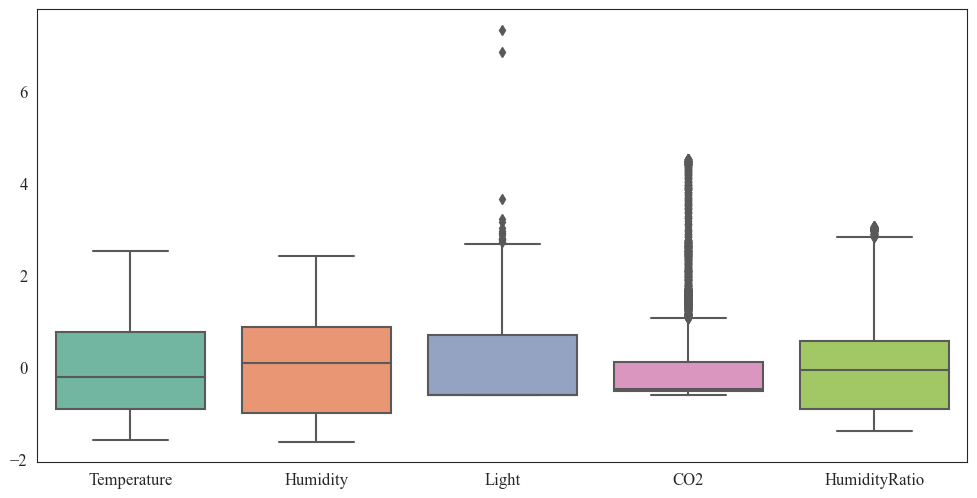

In [11]:
#visualisation of the data using a box plot after normalization
chart = sns.boxplot(data=X, orient="v", palette="Set2")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

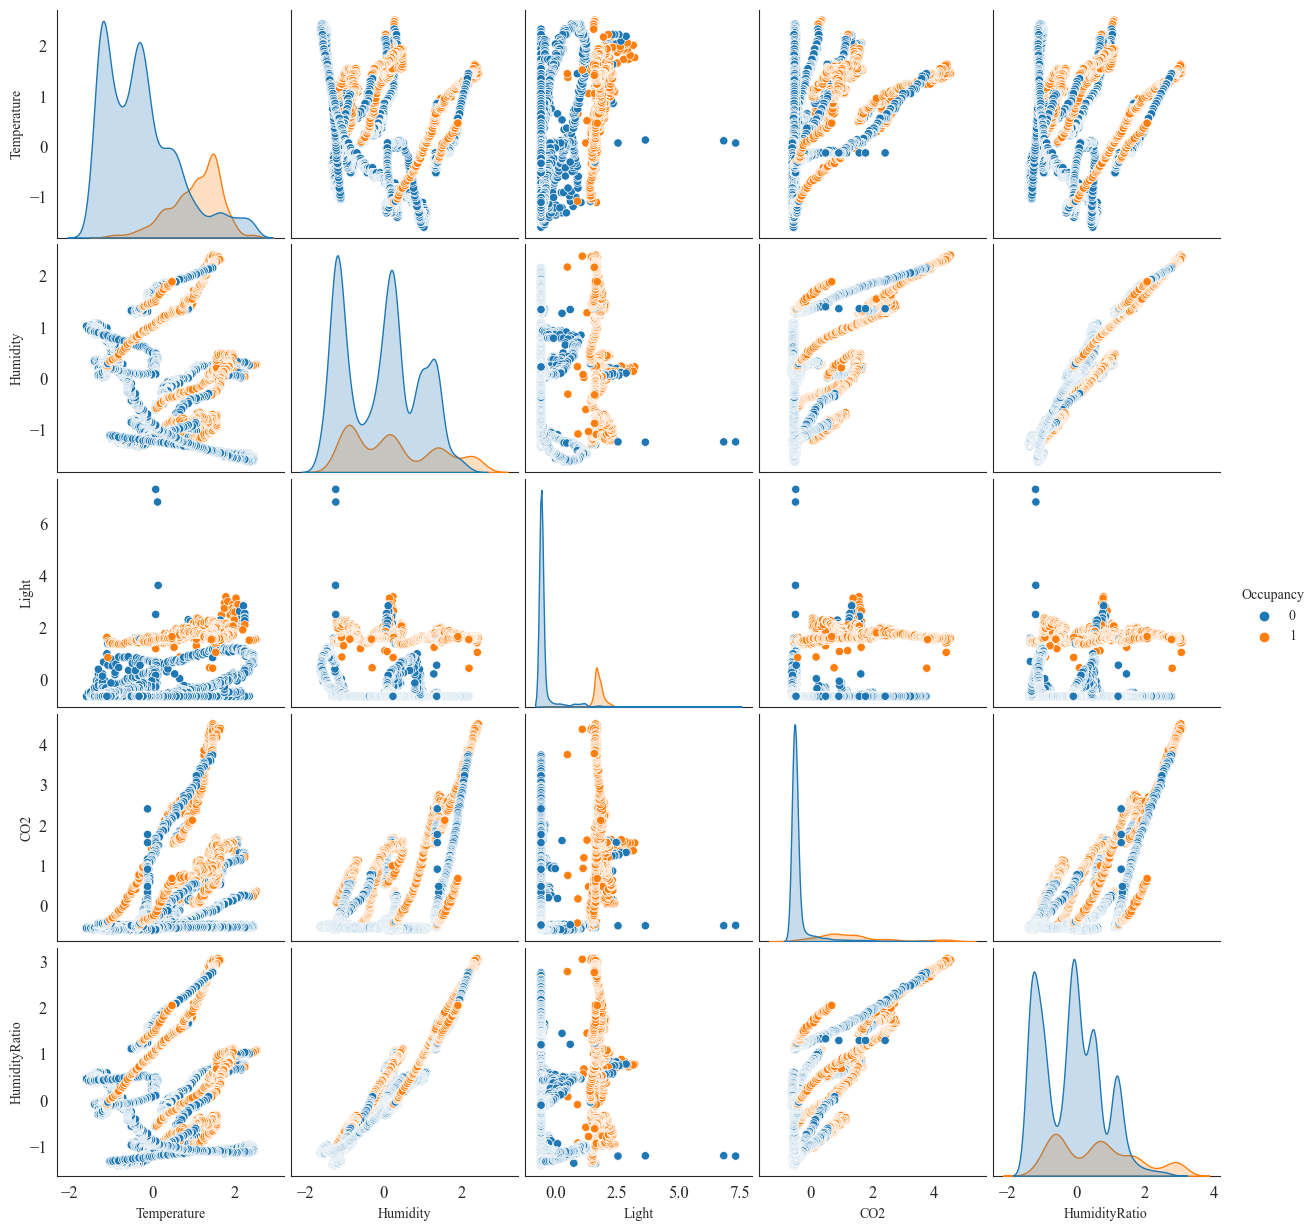

In [12]:
#pairplot
merged = X[:]
merged[target] = Y
sns.pairplot(merged, hue = target)
plt.savefig('pairplot.eps', format='eps')

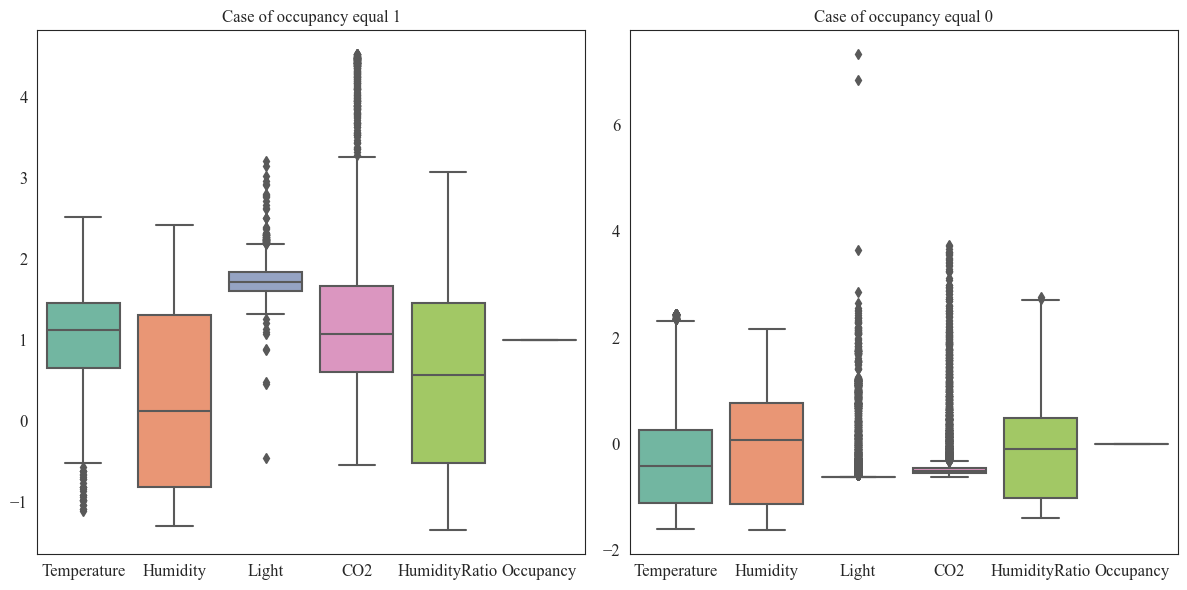

In [13]:
#visualisation of the data using a box plot after normalization
fig, [ax1, ax2] = plt.subplots(1,2)
sns.boxplot(data=merged[merged['Occupancy']==1], orient="v", palette="Set2", ax=ax1)
sns.boxplot(data=merged[merged['Occupancy']==0], orient="v", palette="Set2", ax=ax2)
ax1.set_title('Case of occupancy equal 1')
ax2.set_title('Case of occupancy equal 0')
fig.tight_layout() 
plt.savefig('pairplot_0_1.eps', format='eps')

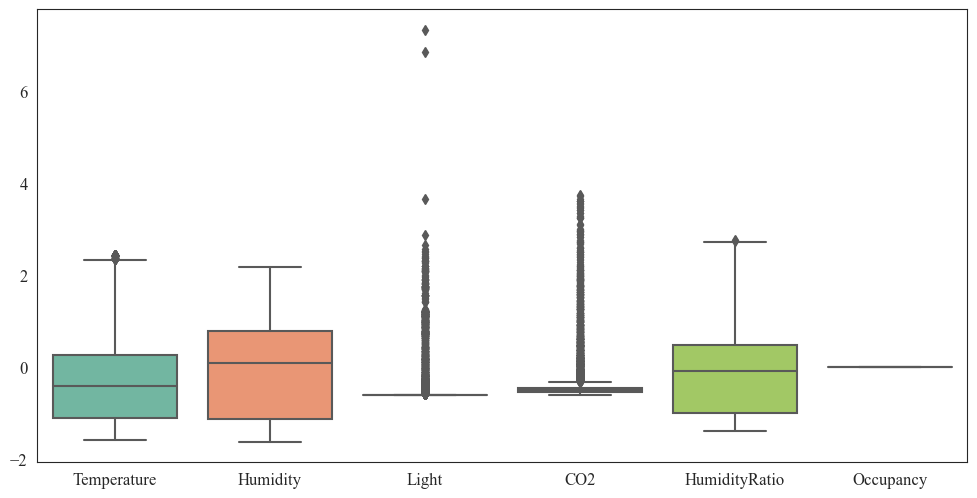

In [14]:
chart = sns.boxplot(data=merged[merged['Occupancy']==0], orient="v", palette="Set2")

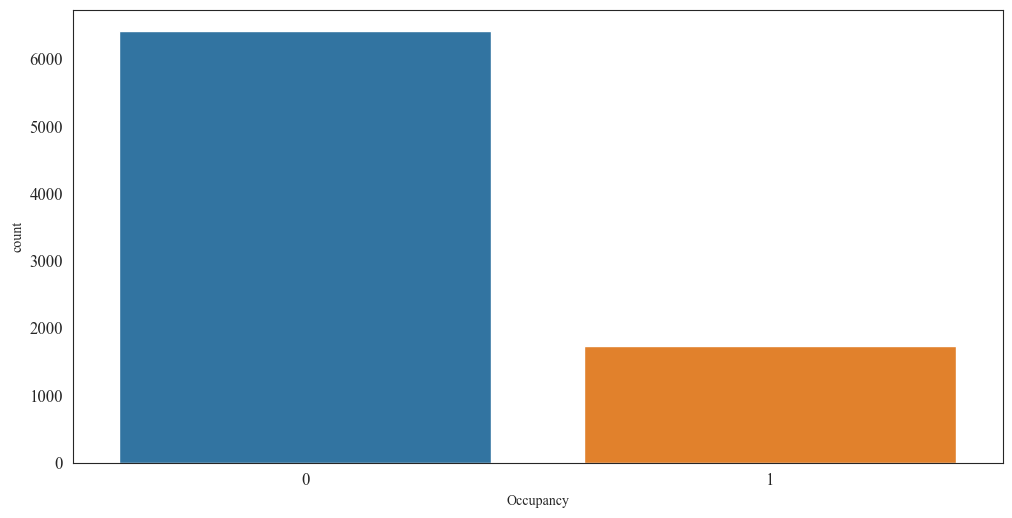

In [15]:
#count the size of each class 
sns.countplot(merged[target], label = "Count")
plt.savefig('count.eps', format='eps')

<AxesSubplot:xlabel='Temperature', ylabel='CO2'>

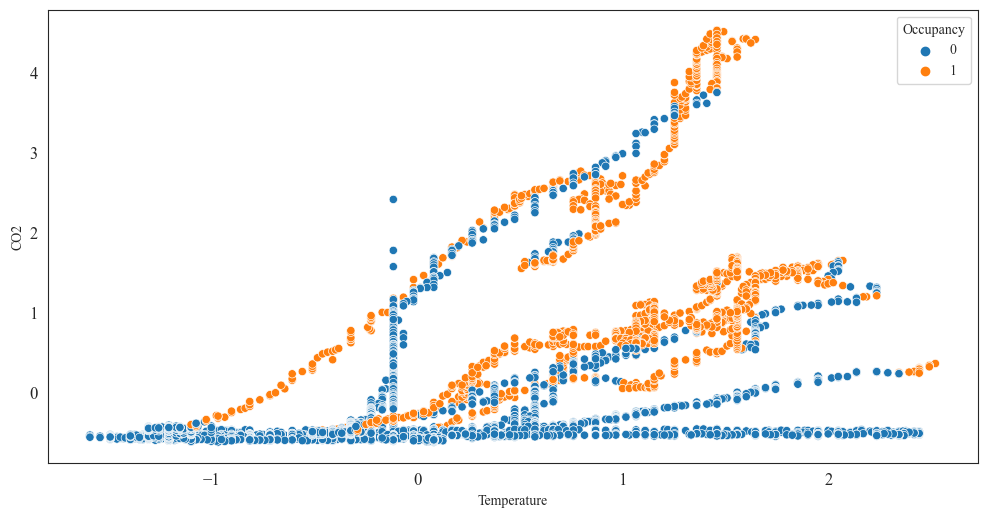

In [16]:
#plot Temperature vs CO2
sns.scatterplot(x = 'Temperature', y = 'CO2', hue = target, data = merged)

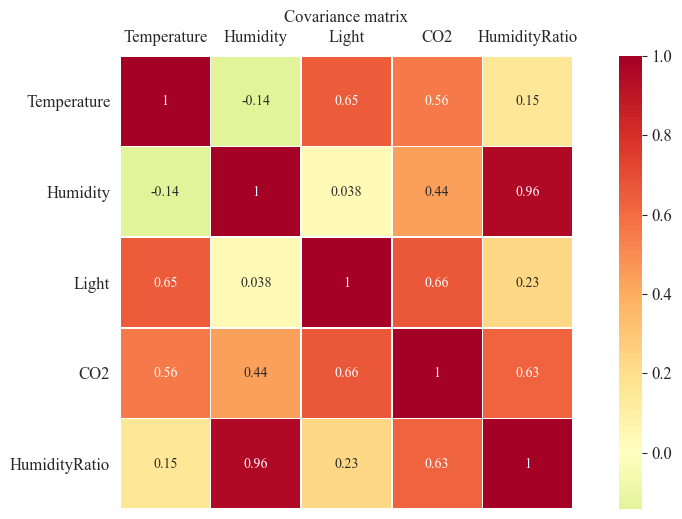

In [17]:
#Covariance
plt. figure()
ax = sns.heatmap(X.cov(), center=0,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Covariance matrix')
plt.savefig('cov.eps', format='eps')

<AxesSubplot:xlabel='Temperature', ylabel='CO2'>

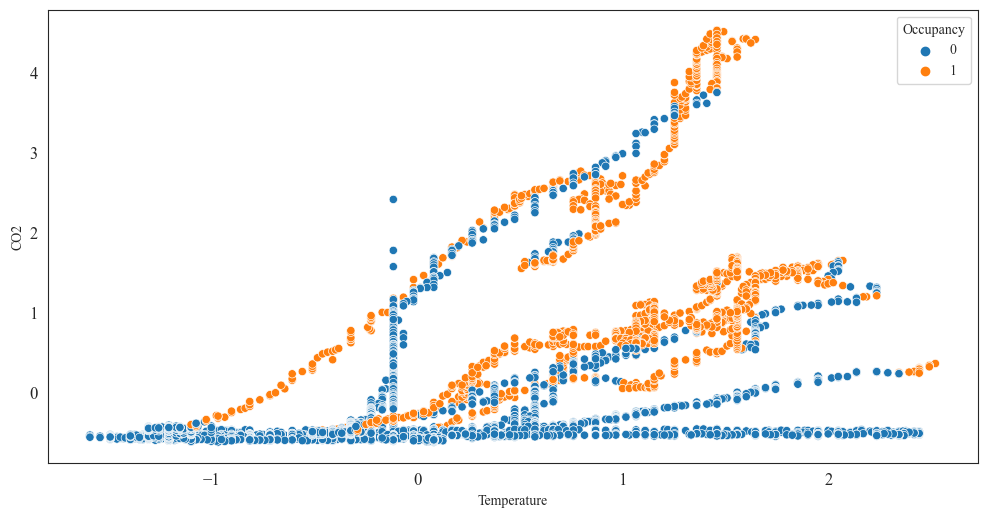

In [18]:
#Principal component analysis
pca = PCA()
pca.fit(X)
Z = pca.fit_transform(X)

sns.scatterplot(x = 'Temperature', y = 'CO2', hue = target, data = merged)

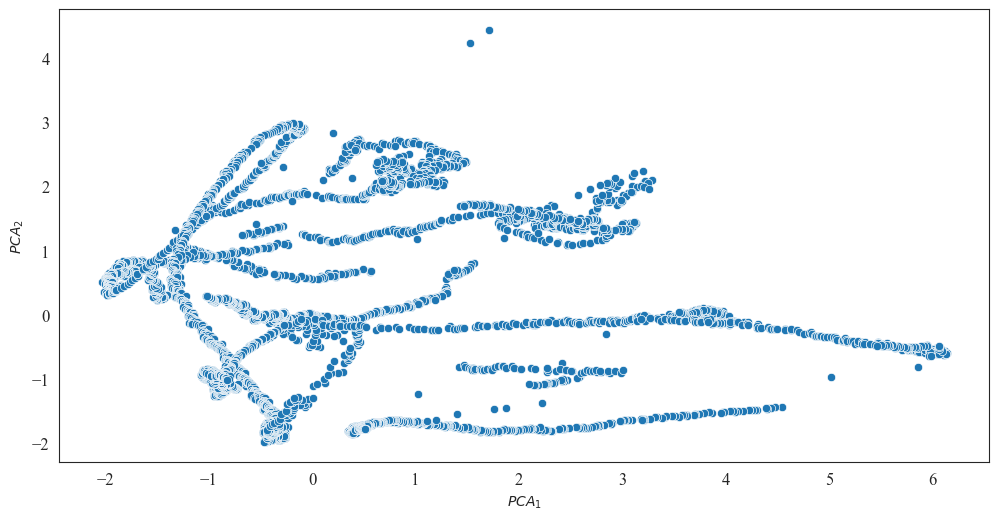

In [19]:
#plot the first component vs the second
sns.scatterplot(Z[:,0], Z[:,1])
plt.xlabel('$PCA_1$')
plt.ylabel('$PCA_2$')
plt.savefig('pcas.eps', format='eps')

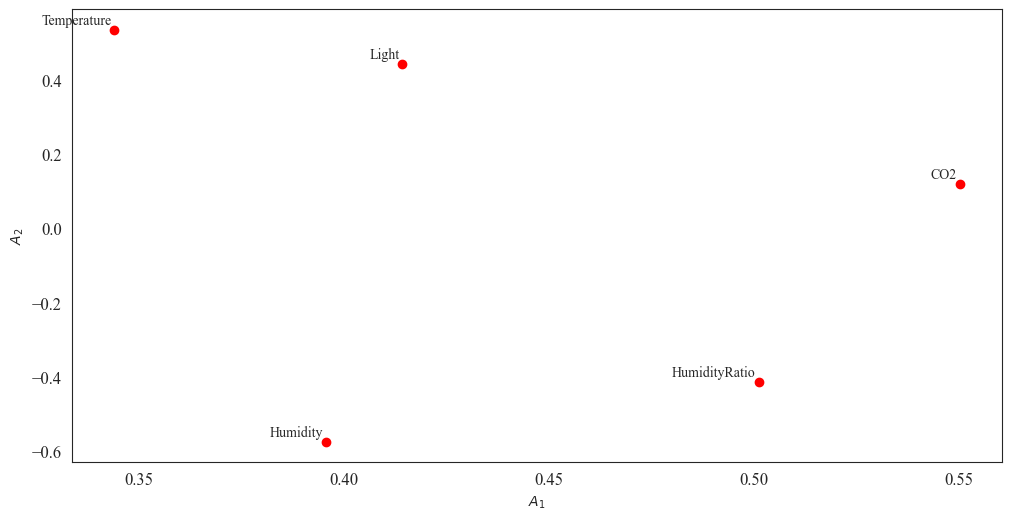

In [20]:
#Eigenvectors 
variables = list(X.columns)

A = pca.components_.T
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:,0],A[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

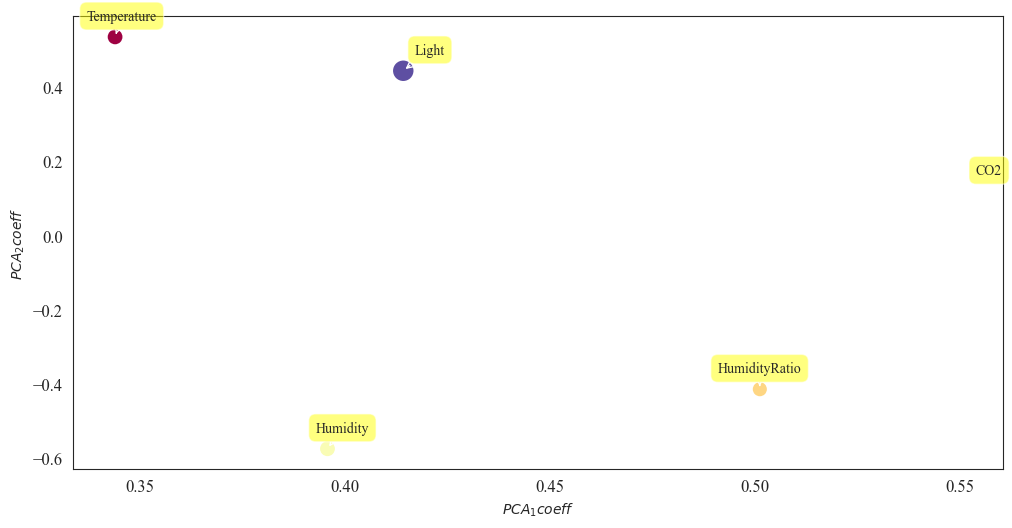

In [21]:
plt. figure()
sns.scatterplot(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,3]*500,
    cmap=plt.get_cmap('Spectral'))
plt.xlabel('$PCA_1 coeff$')
plt.ylabel('$PCA_2 coeff$')
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(30, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.savefig('coeff.eps', format='eps')

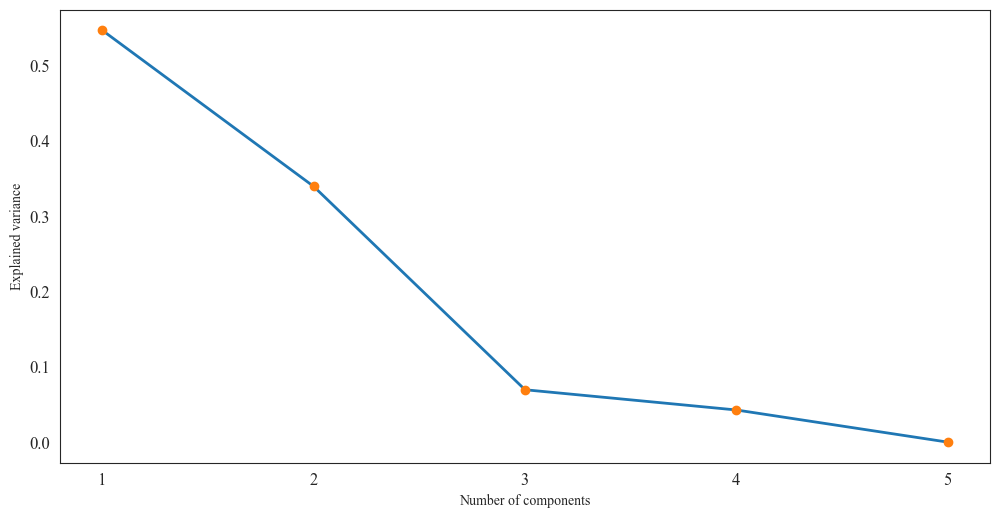

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), '-', lw=2)
plt.plot(x,Lambda/sum(Lambda), 'o', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('screeplot.eps', format='eps')


In [23]:
Lambda/sum(Lambda)

array([5.47304742e-01, 3.39894126e-01, 6.97658600e-02, 4.28734209e-02,
       1.61851858e-04])

In [24]:
(Lambda[0]+Lambda[1])/sum(Lambda)

0.8871988672985097

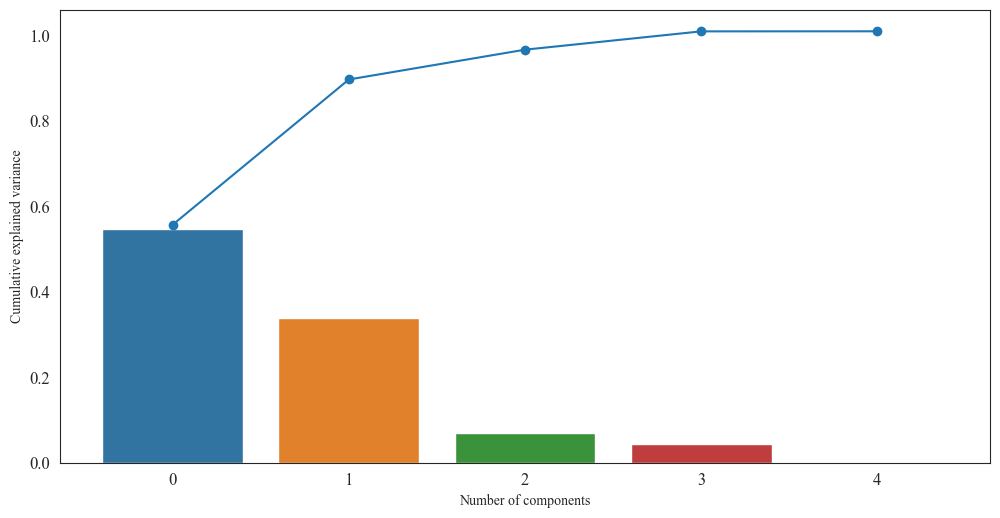

In [25]:
#Explained variance
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
sns.barplot(ind, ell)
plt.plot(np.cumsum(ell)+0.01, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig('lamda.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


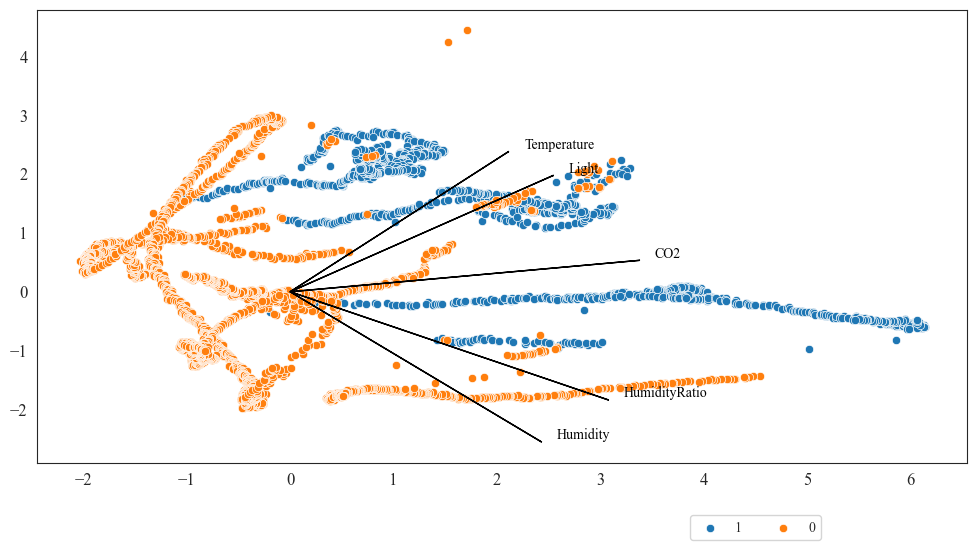

In [26]:
#Biplot
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
A3 = A[:,2]
Z1 = Z[:,0] 
Z2 = Z[:,1]
Z3 = Z[:,2]

fig, ax = plt.subplots()

for i in range(len(A1)):
    ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='black', width=0.00005, head_width=0.0025)
    ax.text(A1[i]*max(Z1)+0.15, A2[i]*max(Z2)+0.05, variables[i], color='black')

for i in merged['Occupancy'].unique():
  sns.scatterplot(Z1[merged['Occupancy']==i], Z2[merged['Occupancy']==i],label=str(i))
legend = ax.legend(shadow=False, ncol=3, bbox_to_anchor=(0.85, -0.1))

plt.savefig('2dbiplot.eps', format='eps')
plt.show()

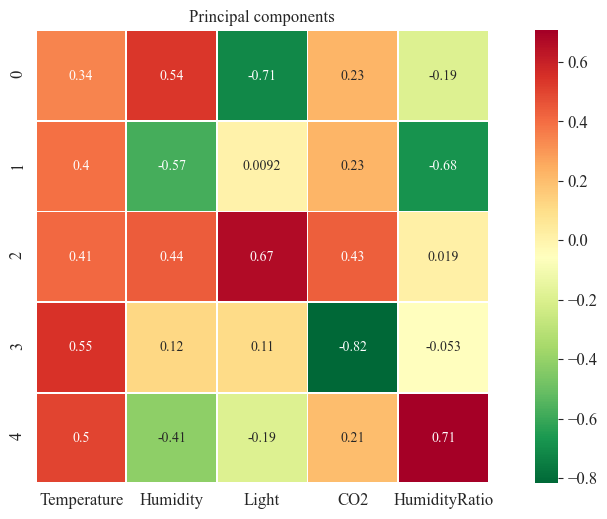

In [27]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')
plt.savefig('pca_cov.eps', format='eps')

Text(0.5, 1.0, 'Principal components')

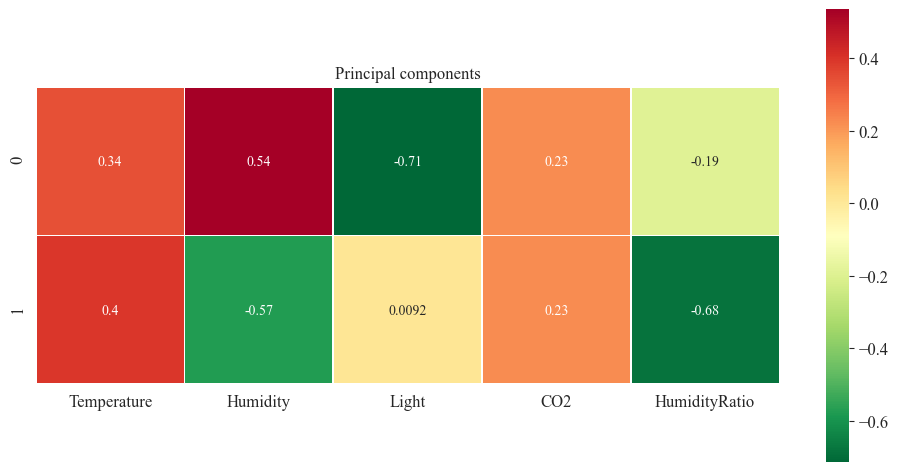

In [28]:
plt.figure()
comps = pd.DataFrame(A[0:2,:],columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
# ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

In [29]:
#the eigenvector matrix
A

array([[ 0.34385624,  0.53586429, -0.71337364,  0.22538246, -0.18685058],
       [ 0.39566375, -0.5741108 ,  0.00924854,  0.22696629, -0.67988804],
       [ 0.41414891,  0.44461199,  0.66542366,  0.43317688,  0.01923539],
       [ 0.55006986,  0.12010568,  0.11093845, -0.81726459, -0.05262155],
       [ 0.50111567, -0.41369197, -0.18951655,  0.2052448 ,  0.70689468]])

## Classification

### SVC

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [31]:
#Split data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6514, 5), (1629, 5), (6514,), (1629,))

In [33]:
#Build and train the model
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [34]:
#predict the unseen test set and draw the confusion matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

In [35]:
print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_predict)*100))  
print('Precision score: %.2f%%' % (precision_score(y_test, y_predict)*100))
print('Recall score: %.2f%%' % (recall_score(y_test, y_predict)*100))

Accuracy score: 99.14%
Precision score: 96.51%
Recall score: 99.72%


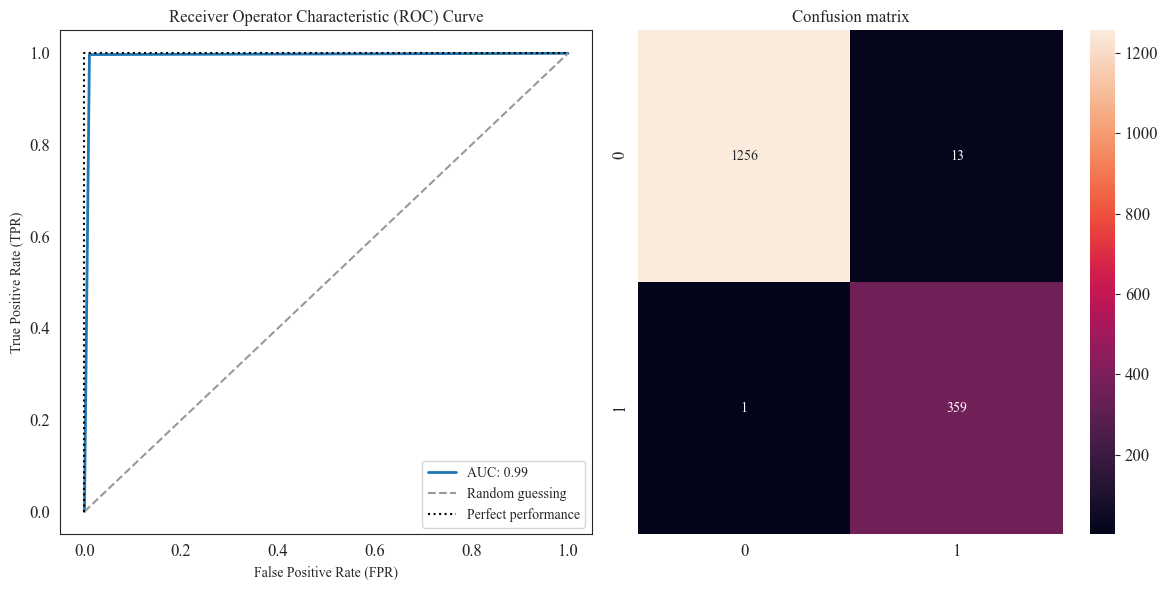

In [36]:
#Plot the confusion matrix and the roc curve
fig, [ax1, ax2] = plt.subplots(1,2)
fpr, tpr, _ = roc_curve(y_test,y_predict)
ax1.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
ax1.plot([0, 1], [0, 1],
            linestyle = '--',
            color = (0.6, 0.6, 0.6),
            label = 'Random guessing')
ax1.plot([0, 0, 1], [0, 1, 1],
            linestyle = ':',
            color = 'black', 
            label = 'Perfect performance')
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('Receiver Operator Characteristic (ROC) Curve')
ax1.legend(loc = "lower right")
fig.tight_layout() 
sns.heatmap(cm, annot=True, fmt='g', ax=ax2).set(title='Confusion matrix')
# -----------------------------------------------------
plt.show()


### Improoving the model

In [37]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [38]:
#improoving the model using grid search to find the best parameters
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)

In [39]:
%%time
grid.fit(X_train,y_train)

Wall time: 6.64 s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [40]:
#Best parameters
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [41]:
#Best Estimator
grid.best_estimator_

SVC(C=10, gamma=1)

In [42]:
#Predixt the classes of the test set
grid_predictions = grid.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, grid_predictions)

In [44]:
print('Accuracy score: %.2f%%' %(accuracy_score(y_test, grid_predictions)*100))  
print('Precision score: %.2f%%' % (precision_score(y_test, grid_predictions)*100))
print('Recall score: %.2f%%' % (recall_score(y_test, grid_predictions)*100))

Accuracy score: 99.69%
Precision score: 98.63%
Recall score: 100.00%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


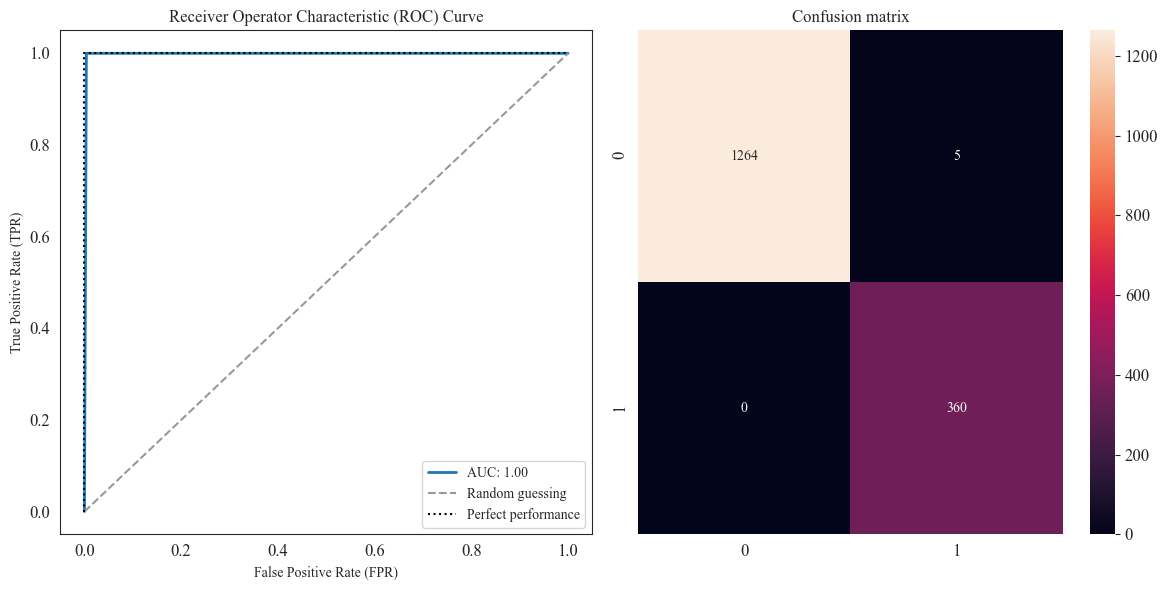

In [45]:
#Plot the confusion matrix and the roc curve
fig, [ax1, ax2] = plt.subplots(1,2)
fpr, tpr, _ = roc_curve(y_test,grid_predictions)
ax1.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
ax1.plot([0, 1], [0, 1],
            linestyle = '--',
            color = (0.6, 0.6, 0.6),
            label = 'Random guessing')
ax1.plot([0, 0, 1], [0, 1, 1],
            linestyle = ':',
            color = 'black', 
            label = 'Perfect performance')
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('Receiver Operator Characteristic (ROC) Curve')
ax1.legend(loc = "lower right")
fig.tight_layout() 
sns.heatmap(cm, annot=True, fmt='g', ax=ax2).set(title='Confusion matrix')
# -----------------------------------------------------
plt.savefig('cm_alldata.eps', format='eps')
plt.show()


## SVC with pca

In [46]:
#We take only the first two compoenents
Z12 = pd.DataFrame(Z[:,:2])

In [47]:
#Split data into 80% training set and 20% testing set
Z_train, Z_test, y_train, y_test = train_test_split(Z12, Y, test_size = 0.20, random_state=5)

In [48]:
Z_train.shape, Z_test.shape, y_train.shape, y_test.shape

((6514, 2), (1629, 2), (6514,), (1629,))

In [49]:
#Build and train the model
svc_model = SVC()
svc_model.fit(Z_train, y_train)

SVC()

In [50]:
#predict the unseen test set and draw the confusion matrix
y_predict = svc_model.predict(Z_test)
cm = confusion_matrix(y_test, y_predict)

In [51]:
print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_predict)*100))  
print('Precision score: %.2f%%' % (precision_score(y_test, y_predict)*100))
print('Recall score: %.2f%%' % (recall_score(y_test, y_predict)*100))

Accuracy score: 98.28%
Precision score: 95.86%
Recall score: 96.39%


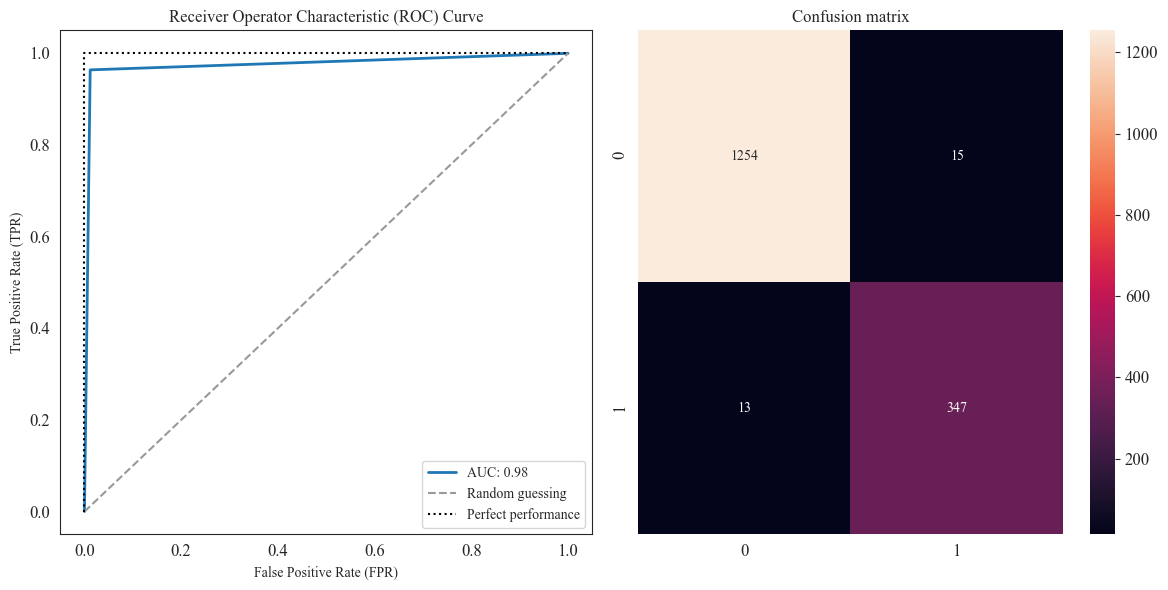

In [52]:
fig, [ax1, ax2] = plt.subplots(1,2)
fpr, tpr, _ = roc_curve(y_test,y_predict)
ax1.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
ax1.plot([0, 1], [0, 1],
            linestyle = '--',
            color = (0.6, 0.6, 0.6),
            label = 'Random guessing')
ax1.plot([0, 0, 1], [0, 1, 1],
            linestyle = ':',
            color = 'black', 
            label = 'Perfect performance')
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('Receiver Operator Characteristic (ROC) Curve')
ax1.legend(loc = "lower right")
fig.tight_layout() 
sns.heatmap(cm, annot=True, fmt='g', ax=ax2).set(title='Confusion matrix')
# -----------------------------------------------------
plt.show()

In [53]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [54]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)

In [55]:
%%time
grid.fit(Z_train,y_train)

Wall time: 8.86 s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [56]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [57]:
grid.best_estimator_

SVC(C=100, gamma=1)

In [58]:
grid_predictions = grid.predict(Z_test)

In [59]:
cm = confusion_matrix(y_test, grid_predictions)

In [60]:
print('Accuracy score: %.2f%%' %(accuracy_score(y_test, grid_predictions)*100))  
print('Precision score: %.2f%%' % (precision_score(y_test, grid_predictions)*100))
print('Recall score: %.2f%%' % (recall_score(y_test, grid_predictions)*100))

Accuracy score: 99.08%
Precision score: 97.52%
Recall score: 98.33%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


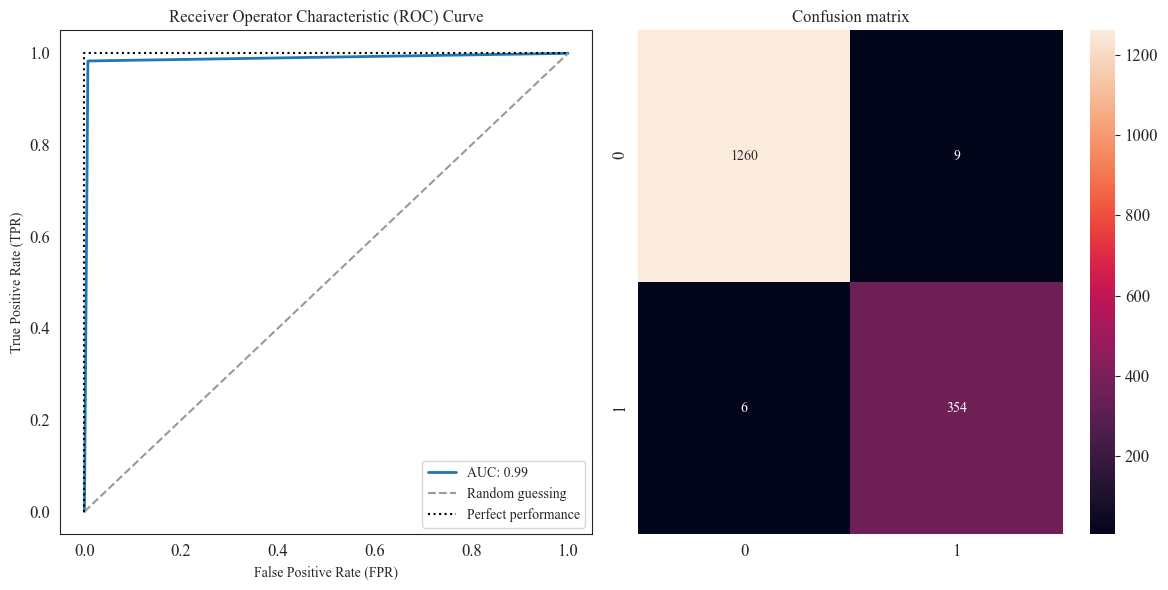

In [61]:
fig, [ax1, ax2] = plt.subplots(1,2)
fpr, tpr, _ = roc_curve(y_test,grid_predictions)
ax1.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
ax1.plot([0, 1], [0, 1],
            linestyle = '--',
            color = (0.6, 0.6, 0.6),
            label = 'Random guessing')
ax1.plot([0, 0, 1], [0, 1, 1],
            linestyle = ':',
            color = 'black', 
            label = 'Perfect performance')
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('Receiver Operator Characteristic (ROC) Curve')
ax1.legend(loc = "lower right")
fig.tight_layout() 
sns.heatmap(cm, annot=True, fmt='g', ax=ax2).set(title='Confusion matrix')
# -----------------------------------------------------
plt.savefig('svm_pca_cm_tuned.eps', format='eps')
plt.show()


### Decision boundries

In [62]:
#!pip install mlxtend

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

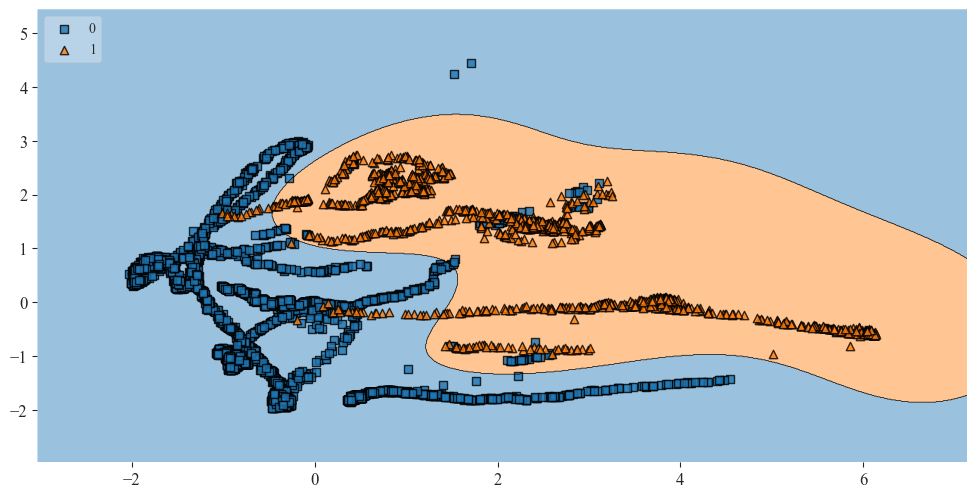

In [63]:
#SVM DECISION BOUNDARY before parameter tuning
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(Z_train),np.array(y_train), clf=svc_model, legend=2)
plt.savefig('boundry_untuned.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

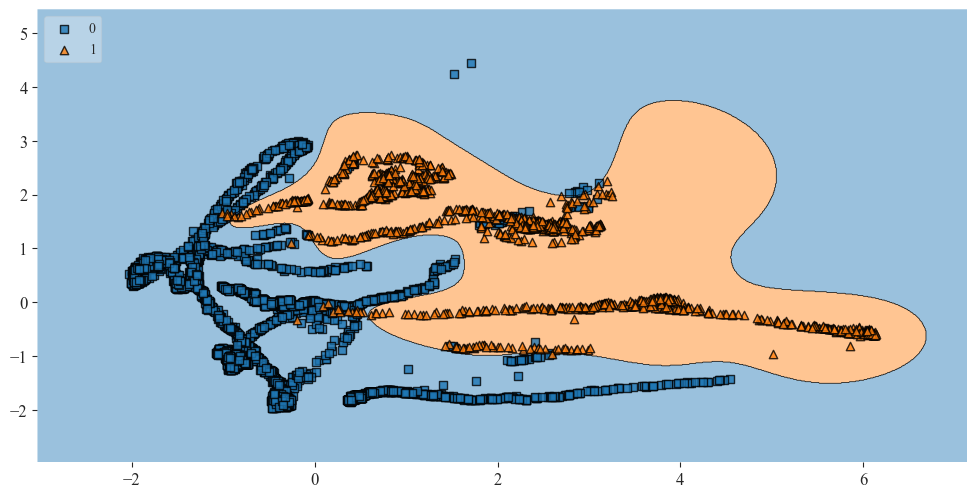

In [64]:
#SVM DECISION BOUNDARY after parameter tuning
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(Z_train),np.array(y_train), clf=grid, legend=2)
plt.savefig('boundry_tuned.eps', format='eps')
plt.show()


### Known classification models:

In [65]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

def run_classifier(clf, param_grid, title, X_train, X_test):
    # -----------------------------------------------------
    cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
    # Randomized grid search
    n_iter_search = 10
    gs = RandomizedSearchCV(clf, 
                            param_distributions = param_grid,
                            n_iter = n_iter_search, 
                            cv = cv, 
                            iid = False,
                            scoring= 'accuracy',
                            verbose=1,
                            n_jobs=-1)
    # -----------------------------------------------------
    # Train model
    gs.fit(X_train, y_train)  
    print("The best parameters are %s" % (gs.best_params_)) 
    # Predict on test set
    y_pred = gs.best_estimator_.predict(X_test)
    # Get Probability estimates
    y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
    # -----------------------------------------------------
    print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred)*100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred)*100))
    # ----------------------------------------------------- 
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(21, 7))
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
    ax1.set_title("Confusion Matrix")
    ax1.set_xlabel("Predicted class")
    ax1.set_ylabel("Actual class")
    fig.tight_layout()
    # -----------------------------------------------------
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax2.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
    ax2.plot([0, 1], [0, 1],
             linestyle = '--',
             color = (0.6, 0.6, 0.6),
             label = 'Random guessing')
    ax2.plot([0, 0, 1], [0, 1, 1],
             linestyle = ':',
             color = 'black', 
             label = 'Perfect performance')
    ax2.set_xlim([-0.05, 1.05])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate (FPR)')
    ax2.set_ylabel('True Positive Rate (TPR)')
    ax2.set_title('Receiver Operator Characteristic (ROC) Curve')
    ax2.legend(loc = "lower right")
    fig.tight_layout()      
    # -----------------------------------------------------
    plt.show()

#### LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

param_grid = {'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.6s finished


The best parameters are {'solver': 'newton-cg', 'penalty': 'l2'}
Accuracy score: 98.65%
Precision score: 96.43%
Recall score: 97.50%


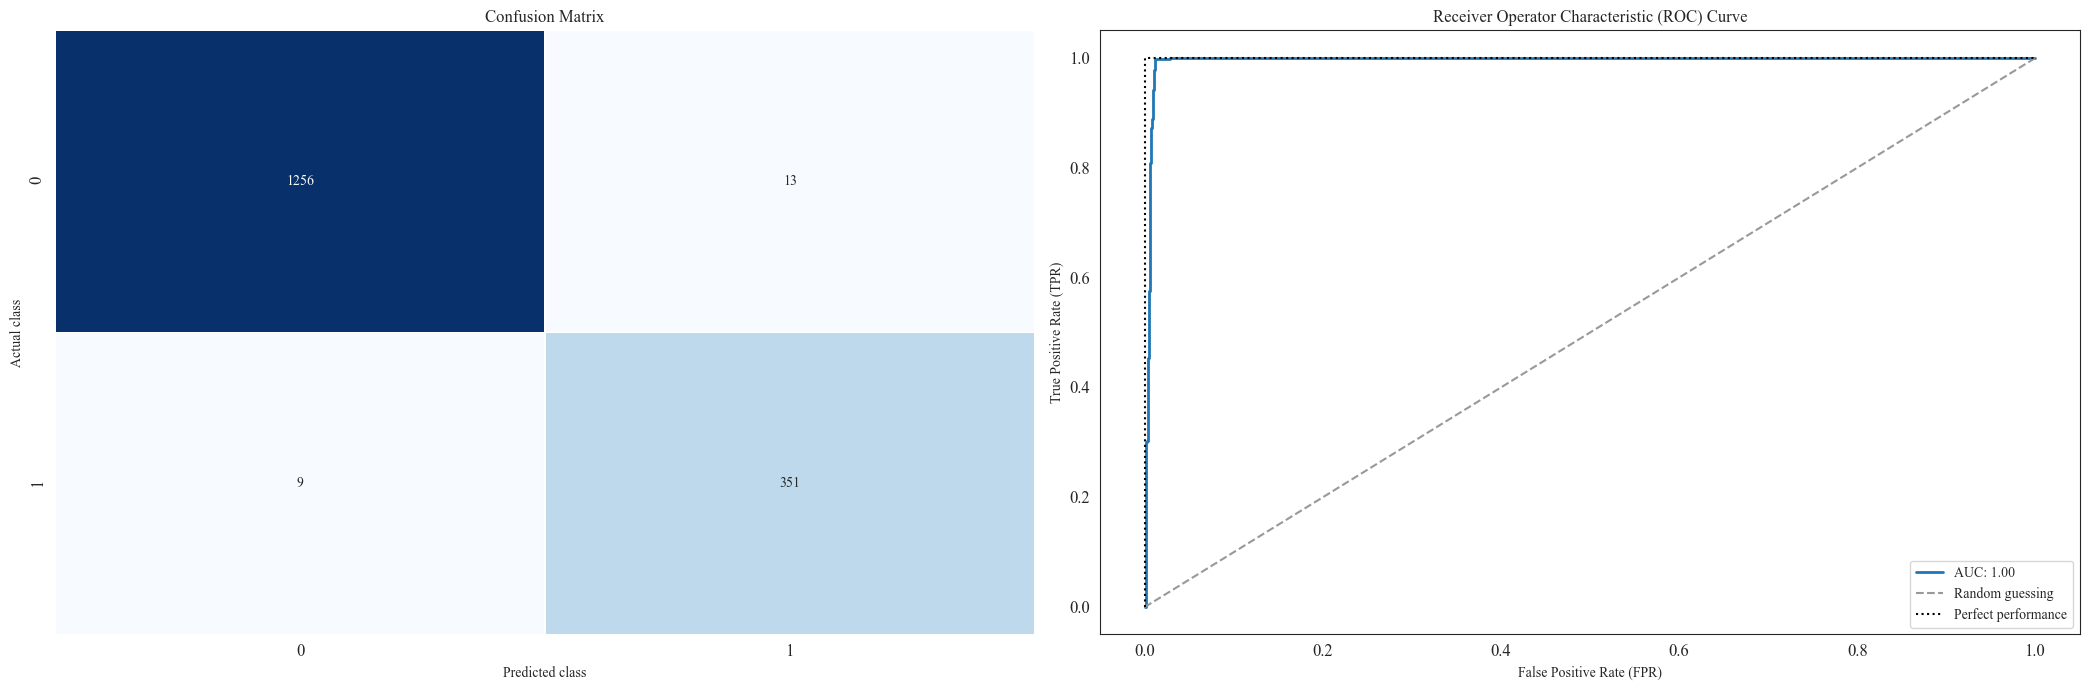

In [67]:
run_classifier(lr, param_grid, 'Logistic Regression', X_train, X_test)

##### Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

param_grid = {'priors': [None]}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
The best parameters are {'priors': None}
Accuracy score: 98.53%
Precision score: 94.68%
Recall score: 98.89%


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


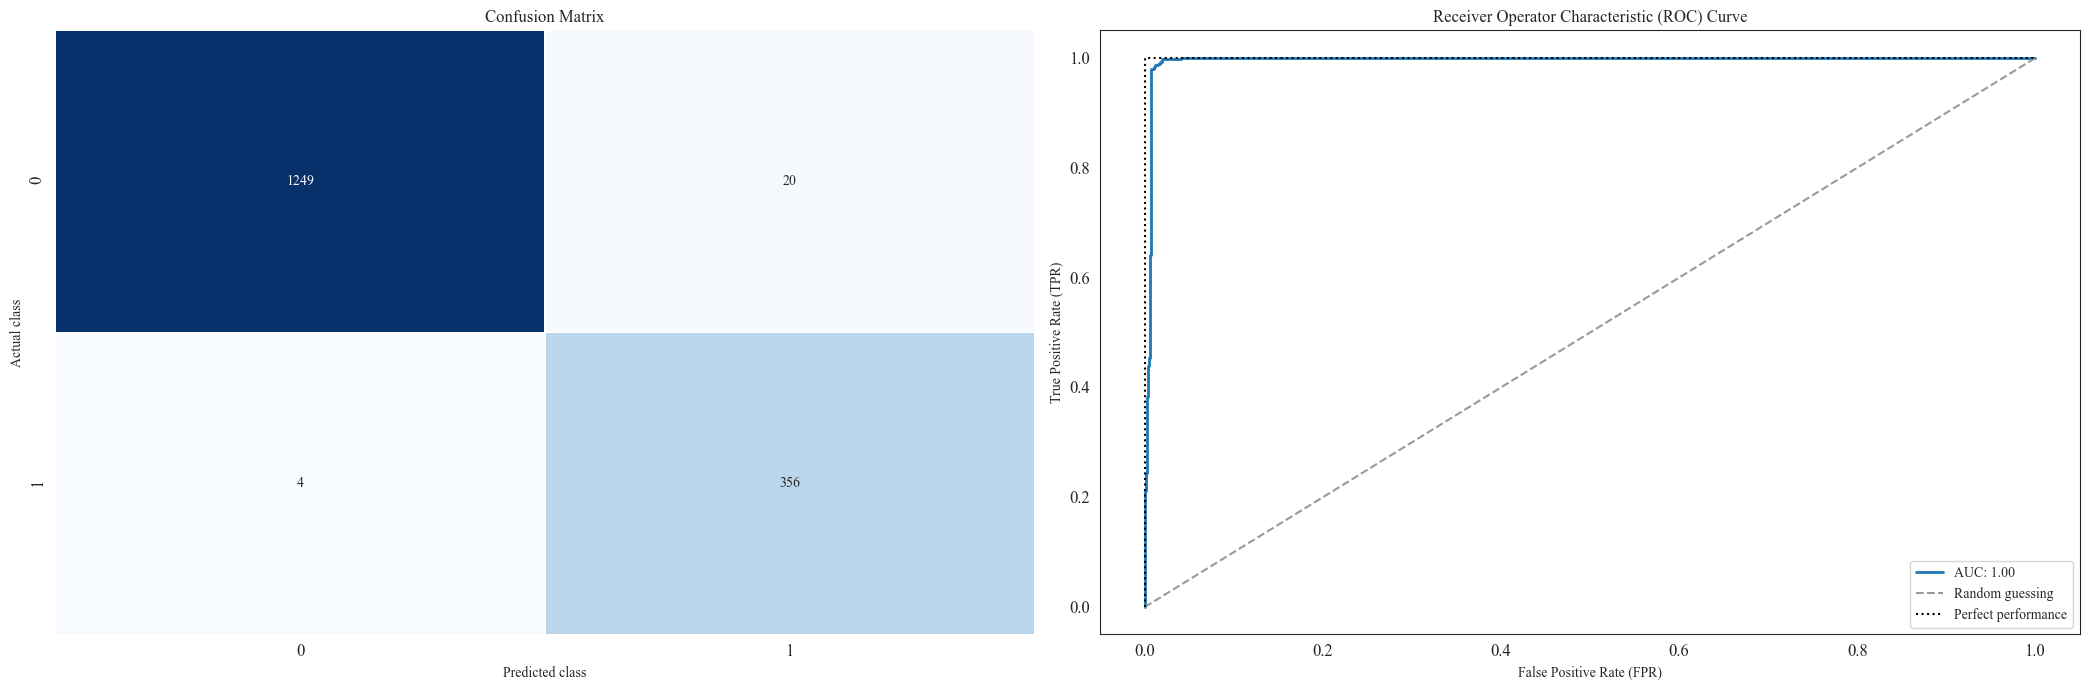

In [69]:
run_classifier(nb, param_grid, 'Naive Bayes', X_train, X_test)

#### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(1, 20, 2),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'max_features': ['auto', 'sqrt', 'log2', None]}

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best parameters are {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 17, 'criterion': 'entropy'}
Accuracy score: 99.08%
Precision score: 97.78%
Recall score: 98.06%


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


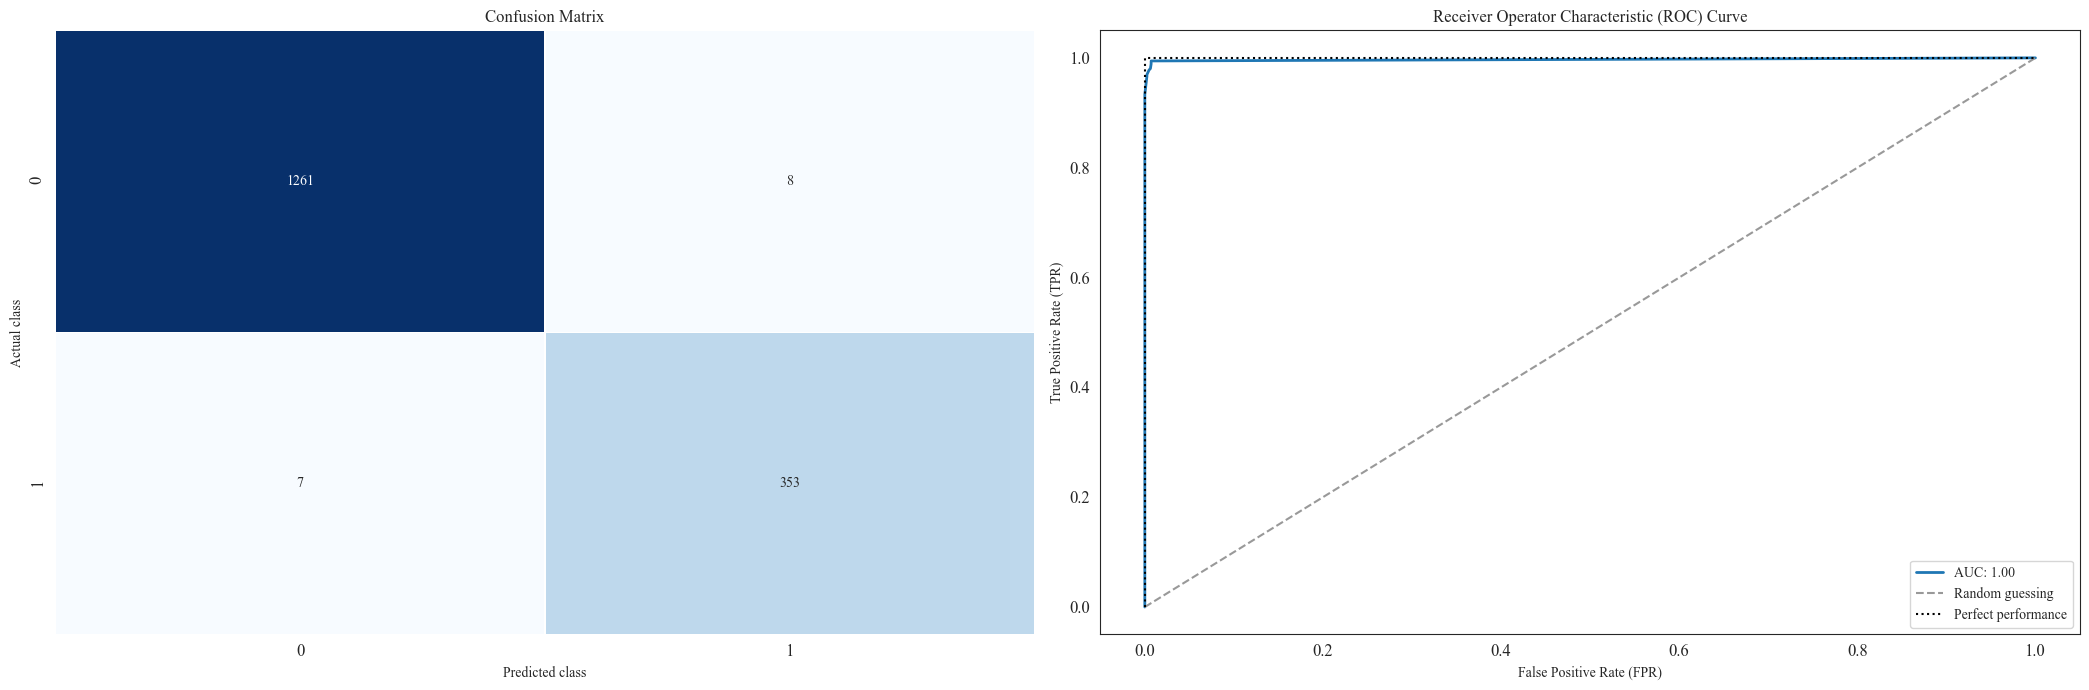

In [71]:
run_classifier(dtree, param_grid, "Decision Tree", X_train, X_test)

#### Random forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20, 100, None],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.9s finished


The best parameters are {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy', 'bootstrap': True}
Accuracy score: 99.69%
Precision score: 99.17%
Recall score: 99.44%


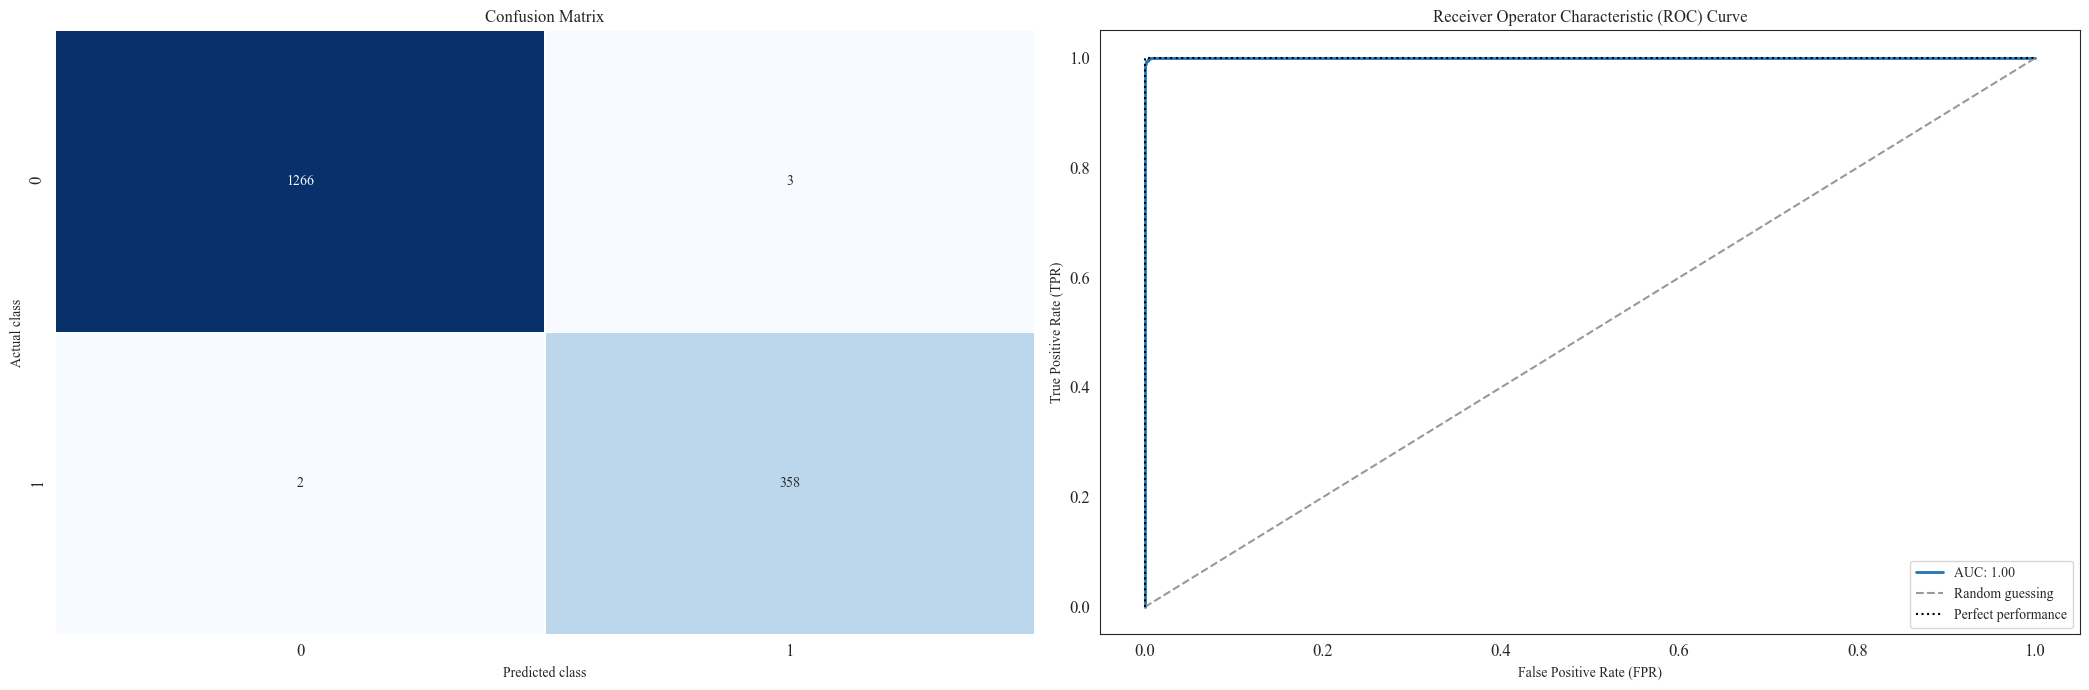

In [73]:
run_classifier(rf, param_grid, 'Random Forest', X_train, X_test)


#### ANN

In [74]:
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter=300,activation = 'relu',solver='adam')
param_grid = {}


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished


The best parameters are {}
Accuracy score: 99.69%
Precision score: 98.63%
Recall score: 100.00%


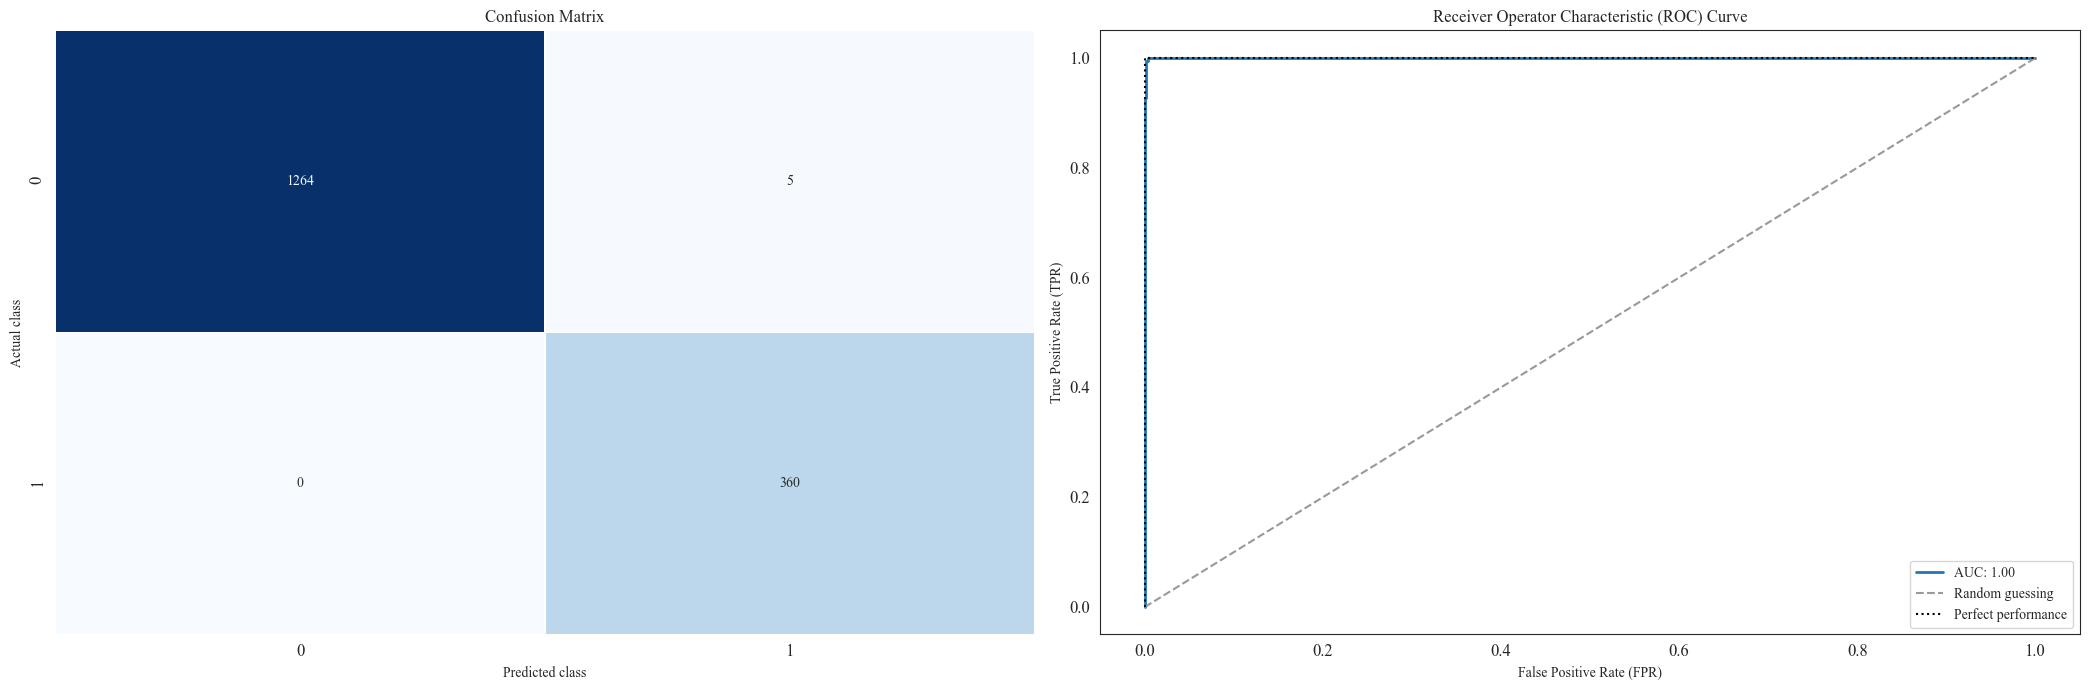

In [75]:
run_classifier(ann_clf, param_grid, 'ANN', X_train, X_test)